In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
import json

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preparing Data

In [3]:
first_round_perfornance = pd.read_csv('Data/first_round_performance_per_condition.csv',index_col= 0)
first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_performance_per_condition.csv',index_col= 0)
second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [14]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.head()

,mturkID,second_go2avoidPun,second_go2win,second_nogo2avoidPun,second_nogo2win,first_go2avoidPun,first_go2win,first_nogo2avoidPun,first_nogo2win
0,A12FTSX85NQ8N9,0.866667,1.000000,0.966667,0.866667,0.566667,0.500000,0.866667,0.866667
1,A1DZMZTXWOM9MR,0.900000,1.000000,0.966667,0.966667,0.900000,1.000000,0.900000,0.933333
2,A1MJVTR0PCKBWW,0.433333,0.900000,0.533333,0.033333,0.466667,0.633333,0.700000,0.733333
3,A1R8A8BK2VN7RH,0.900000,0.966667,0.966667,0.966667,0.900000,0.833333,0.933333,0.766667
4,A1UDOSYE75OYYI,0.533333,0.700000,0.833333,0.633333,0.633333,0.733333,0.733333,0.933333


# First Hypothesis
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

In [29]:
all_performance['first_rel_nogo2win'] = all_performance['first_go2win'] - all_performance['first_nogo2win'] 
all_performance['second_rel_nogo2win'] = all_performance['second_go2win'] - all_performance['second_nogo2win'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['first_go2win'] - all_performance['first_nogo2avoidPun']
all_performance['second_rel_nogo2avoidPun'] = all_performance['second_go2win'] - all_performance['second_nogo2avoidPun'] 


# No Go to Win Conditions

In [25]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.38220117352509086
p-value:  0.030869548391660073


<AxesSubplot:xlabel='first_rel_nogo2win', ylabel='second_rel_nogo2win'>

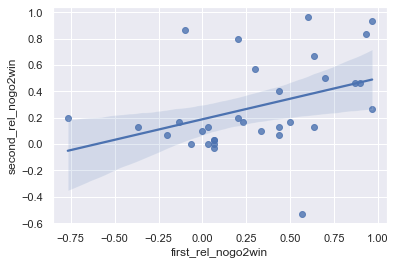

In [22]:
sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win)

In [26]:
test_res = stats.pearsonr(all_performance.first_nogo2win, all_performance.second_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.42967617457281104
p-value:  0.014115533927463723


<AxesSubplot:xlabel='first_nogo2win', ylabel='second_nogo2win'>

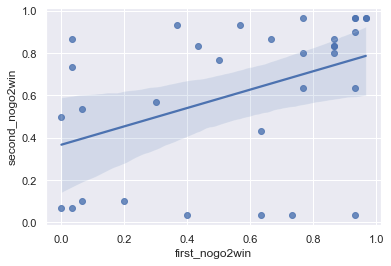

In [23]:
sns.regplot(x = all_performance.first_nogo2win, y = all_performance.second_nogo2win)

# No Go to Avoid Punishment Conditions

In [30]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2avoidPun, all_performance.second_rel_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  -0.023508115873699942
p-value:  0.898379574891061


<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

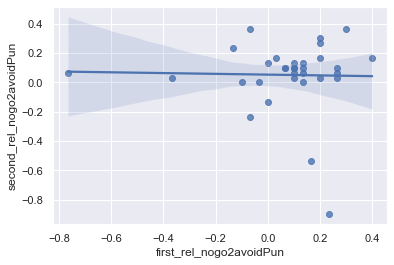

In [33]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

In [34]:
test_res = stats.pearsonr(all_performance.first_nogo2avoidPun, all_performance.second_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.5867183202414702
p-value:  0.0004164406721356581


<AxesSubplot:xlabel='first_nogo2avoidPun', ylabel='second_nogo2avoidPun'>

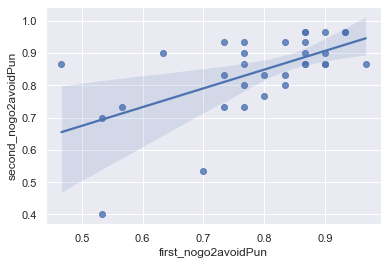

In [35]:
sns.regplot(x = all_performance.first_nogo2avoidPun, y = all_performance.second_nogo2avoidPun)

# Second Hypothesis

In [36]:
Questionnare_data = pd.read_csv('Data/cleaned_questionnaire_data.csv', index_col= 0).drop(18)

In [37]:
Questionnare_data['has_pet'] = np.logical_not(Questionnare_data['pet-0'] == 'no') + (Questionnare_data['pet-1'] == 'yes') 

In [38]:
Questionnare_data['restraint'] = ((Questionnare_data['1']) + Questionnare_data['2'] + Questionnare_data['3'] + (Questionnare_data['4']) + (Questionnare_data['5']))/5
Questionnare_data['eating_concern'] = ((Questionnare_data['7']) + Questionnare_data['9'] + Questionnare_data['20'] + (Questionnare_data['19']) + (Questionnare_data['21']))/5
Questionnare_data['weight_concern'] = ((Questionnare_data['22']) + Questionnare_data['24'] + Questionnare_data['8'] + (Questionnare_data['25']) + (Questionnare_data['12']))/5
Questionnare_data['shape_concern'] = ((Questionnare_data['6']) + Questionnare_data['8'] + Questionnare_data['23'] + (Questionnare_data['10']) + (Questionnare_data['26']) \
    + Questionnare_data['27'] + Questionnare_data['28'] + Questionnare_data['11'])/8

Questionnare_data['global_score'] = (Questionnare_data['restraint'] + Questionnare_data['eating_concern'] + Questionnare_data['weight_concern'] + Questionnare_data['shape_concern'])/4



In [53]:
perf_questionnaire_data = pd.merge(Questionnare_data, first_round_perfornance, left_on='index',right_on='mturkID' )


In [72]:

perf_questionnaire_data["pet-type"] = perf_questionnaire_data["pet-type"].map(lambda x: x if type(x)!=str else x.lower())

# Eating Disorder Index Vs. nogo2win Performance

<AxesSubplot:xlabel='global_score', ylabel='first_nogo2win'>

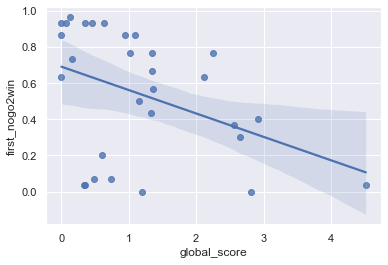

In [41]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'first_nogo2win')

In [42]:
test_res = stats.pearsonr(perf_questionnaire_data.global_score, perf_questionnaire_data.first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  -0.40450579749276955
p-value:  0.026612309111768588


# Restraint Index Vs. nogo2win Performance

<AxesSubplot:xlabel='restraint', ylabel='first_nogo2win'>

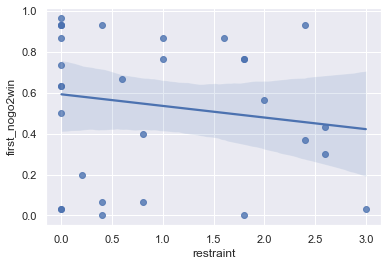

In [43]:
sns.regplot(data = perf_questionnaire_data, x = 'restraint', y = 'first_nogo2win')

In [44]:
test_res = stats.pearsonr(perf_questionnaire_data.restraint, perf_questionnaire_data.first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.16269815308773733
p-value:  0.39033318492844304


# Eating Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='eating_concern', ylabel='first_nogo2win'>

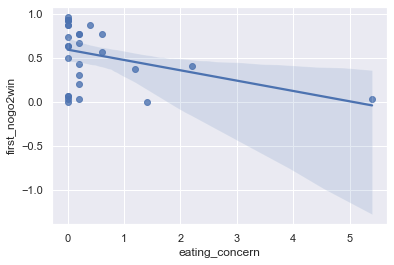

In [45]:
sns.regplot(data = perf_questionnaire_data, x = 'eating_concern', y = 'first_nogo2win')

In [46]:
test_res = stats.pearsonr(perf_questionnaire_data.eating_concern, perf_questionnaire_data.first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.35743438010956596
p-value:  0.052480936476618265


# Weight Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='weight_concern', ylabel='first_nogo2win'>

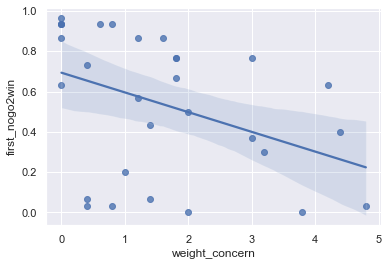

In [47]:
sns.regplot(data = perf_questionnaire_data, x = 'weight_concern', y = 'first_nogo2win')

In [48]:
test_res = stats.pearsonr(perf_questionnaire_data.weight_concern, perf_questionnaire_data.first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.40089307261101637
p-value:  0.028127795347232625


# Shape Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='shape_concern', ylabel='first_nogo2win'>

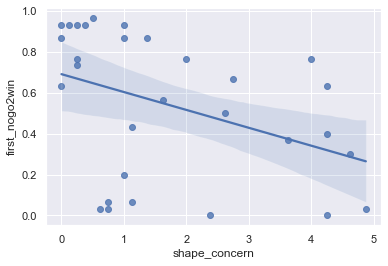

In [49]:
sns.regplot(data = perf_questionnaire_data, x = 'shape_concern', y = 'first_nogo2win')

In [50]:
test_res = stats.pearsonr(perf_questionnaire_data.shape_concern, perf_questionnaire_data.first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.4037845778949078
p-value:  0.026909402468144872


# Pet Analysis

# Nogo 2 Win Performance Vs. has pet?

### we have not enough data to compare these 2 groups

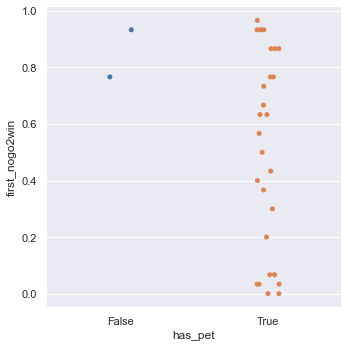

In [59]:
sns.catplot(x = 'has_pet', y = 'first_nogo2win', data = perf_questionnaire_data)

# Nogo 2 Win Performance Vs. Number of Pets

<AxesSubplot:xlabel='pet-number', ylabel='first_nogo2win'>

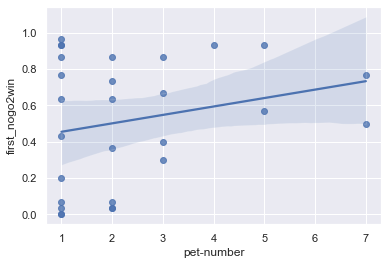

In [55]:
sns.regplot(data = perf_questionnaire_data, x = 'pet-number', y = 'first_nogo2win')

In [58]:
test_res = stats.pearsonr(perf_questionnaire_data.drop([5,27])['pet-number'], perf_questionnaire_data.drop([5,27]).first_nogo2win)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.23426414759641645
p-value:  0.23018679115606752


In [71]:
def clean_pet_type(pet_type):
    if all(x in pet_type for x in ['cat', 'dog']):
        return "both"
    elif('dog' in pet_type):
        return "dog"
    elif('cat' in pet_type):
        return "cat"
    else:
        return ""


In [78]:
perf_questionnaire_data_has_pet = perf_questionnaire_data.drop([5,27])

In [80]:
perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))

# Nogo 2 Win Performance Vs. pet type

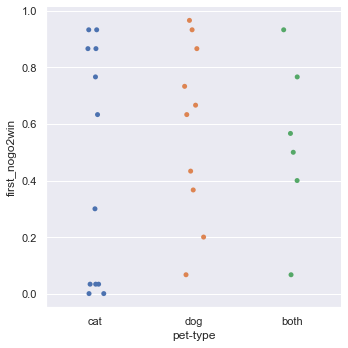

In [82]:
sns.catplot(x = 'pet-type', y = 'first_nogo2win', data = perf_questionnaire_data_has_pet)